In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (train_test_split, GridSearchCV)
from sklearn.metrics import  accuracy_score, confusion_matrix, precision_score, recall_score, make_scorer, f1_score, classification_report
from sklearn.svm import SVC

In [90]:
final_dataset = pd.read_csv('cleaned_data.csv')
final_dataset.head(10)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,target
0,1.157015,-1.234902,-0.985435,-0.765484,-0.173865,-0.077142,-0.670629,-0.162713,-0.939975,-1.195367,-1.082035,0.287438,0.342528,-0.217543,0
1,-0.864293,-0.418205,-0.985435,-0.765484,-0.173865,-0.077142,-0.670629,-0.162713,0.300692,-0.514986,-0.158456,0.719635,1.589522,-0.261279,0
2,1.157015,-0.184863,1.014780,0.963467,-0.173865,-0.077142,-0.670629,-0.162713,0.187904,-0.220155,-0.242418,-0.112835,-0.073137,-0.523697,0
3,-0.864293,1.331861,1.014780,1.827943,-0.173865,-0.077142,1.491138,-0.162713,-0.263248,0.800415,1.017008,0.682800,-0.904467,0.919604,1
4,-0.864293,-0.418205,1.014780,1.222810,-0.173865,-0.077142,-0.670629,-0.162713,1.090208,-0.106758,0.093429,-0.662904,0.758192,0.132348,0
5,-0.864293,-0.768218,-0.985435,-0.765484,-0.173865,-0.077142,1.491138,-0.162713,-0.195575,2.161176,2.276434,1.105174,0.093129,0.744658,0
6,-0.864293,1.565203,-0.985435,-0.765484,-0.173865,-0.077142,-0.670629,-0.162713,-0.714399,0.256111,-0.998074,1.795216,-1.320132,0.132348,1
7,-0.864293,-0.534876,1.014780,0.963467,-0.173865,-0.077142,-0.670629,-0.162713,1.721820,-1.467519,-0.998074,-1.011608,0.259395,-0.173806,0
8,1.157015,0.281822,-0.985435,-0.765484,-0.173865,-0.077142,1.491138,-0.162713,0.526268,0.414867,0.513237,0.137643,0.009996,-0.130070,0
9,1.157015,-0.768218,1.014780,1.827943,-0.173865,-0.077142,1.491138,-0.162713,-0.263248,1.344720,2.024549,-0.537665,1.423256,0.263558,0


<br>

### Labeling the Dataset and doing Train, Test and Split

In [91]:
X = final_dataset.drop('target', axis=1).to_numpy()
y = final_dataset.target.to_numpy()

# Train Test and Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=44)

In [92]:
clf = SVC(class_weight='balanced')
clf.fit(X_train, y_train)

SVC(class_weight='balanced')

In [93]:
y_pred = clf.predict(X_test)

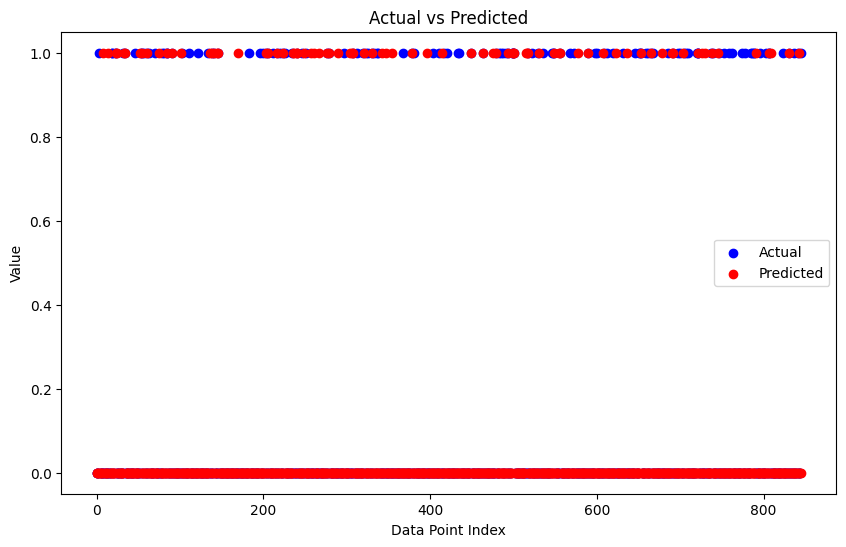

In [94]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_predict)), y_predict, color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [95]:
clf.score(X_train, y_train)

0.7292899408284024

In [96]:
clf.score(X_test, y_test)

0.6725768321513003

In [97]:
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

0.8274231678486997


In [98]:
confusion_matrix = confusion_matrix(y_test, y_predict)

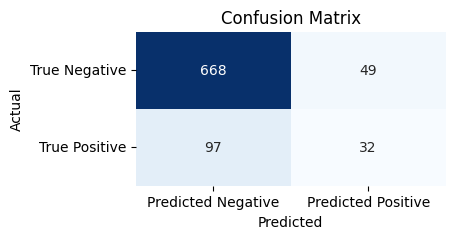

In [99]:
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [100]:
precision = precision_score(y_test, y_predict)
print(f"Our model is {precision*100:.3f} % precised.")

Our model is 39.506 % precised.


In [101]:
recall= recall_score(y_test, y_predict)
print(f"{recall*100:.3f} %")

24.806 %


In [102]:
f1_score(y_test, y_predict)

0.3047619047619048

#### HyperParameter Tunning

In [103]:
param_grid = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'kernel': ['poly', 'linear' ],          # Kernel type
    'degree': [2, 3, 4, 5],          # Polynomial degree
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

In [104]:
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'linear']},
             scoring='accuracy')

In [105]:
best_params = grid_search.best_params_

In [106]:
clf.set_params(**best_params)

SVC(C=0.1, class_weight='balanced', degree=5, gamma='auto', kernel='poly')

In [107]:
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

In [108]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       717
           1       0.40      0.25      0.30       129

    accuracy                           0.83       846
   macro avg       0.63      0.59      0.60       846
weighted avg       0.80      0.83      0.81       846



In [111]:
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy*100:.3f}")

recall = recall_score(y_test, y_predict)
print(f"\nRecall: {recall*100:.3f}")


Accuracy: 82.742

Recall: 24.806


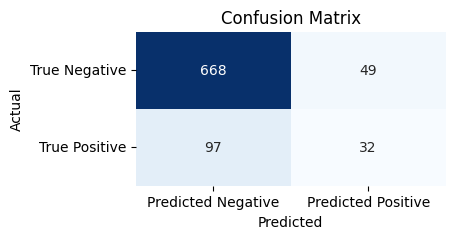

In [112]:
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [113]:
clf.score(X_train, y_train)

0.8636094674556213

In [116]:
clf.score(X_test, y_test)

0.8274231678486997